# KNN
 powerful algorithm used for both Classification and Regression. It is known as a “Lazy Learner” because it doesn’t learn a discriminative function from the training data but memorizes the dataset instead.
## 1.3 KNN (Theory & Concept)
 The Core Idea
The intuition behind KNN is simple: “Tell me who your neighbors are, and I’ll tell you who you are.”

It assumes that similar things exist in close proximity.

The Algorithm Steps
1. Choose K: Select the number of neighbors (e.g., K = 5).
2. Calculate Distance: For a new data point, calculate the distance between it and all other points in the dataset.
-  Most common metric: Euclidean Distance.
    $d(p, q) = \sqrt(\Sigma(q_i - p_i)^2)$
   
3. Find Neighbors: Sort the distances and pick the top  $K$
 smallest ones.
4. Vote (Classification): Count how many neighbors belong to each class. The majority wins.
- Example: If 3 neighbors are “Red” and 2 are “Blue”, the prediction is “Red”.
## Pros & Cons
- Pros: Simple to understand, no training period (lazy), works well with multi-class problems.
- Cons: Slow on large datasets (must calculate distance to every point), sensitive to irrelevant features and scale.


## KNN Decision Boundary
The choice of K determines the shape of the decision boundary.

- Small K (e.g., K=1):
- The model looks at the single closest point.
- Result: A very jagged, complex boundary.
- Problem: High Variance (Overfitting). It captures noise.
- Large K (e.g., K=100):
- The model looks at a huge region.
- Result: A very smooth, simple boundary.
- Problem: High Bias (Underfitting). It misses local patterns.

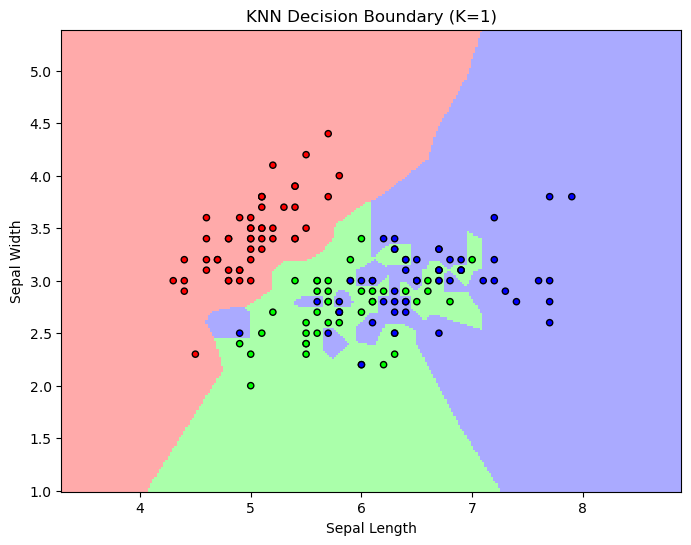

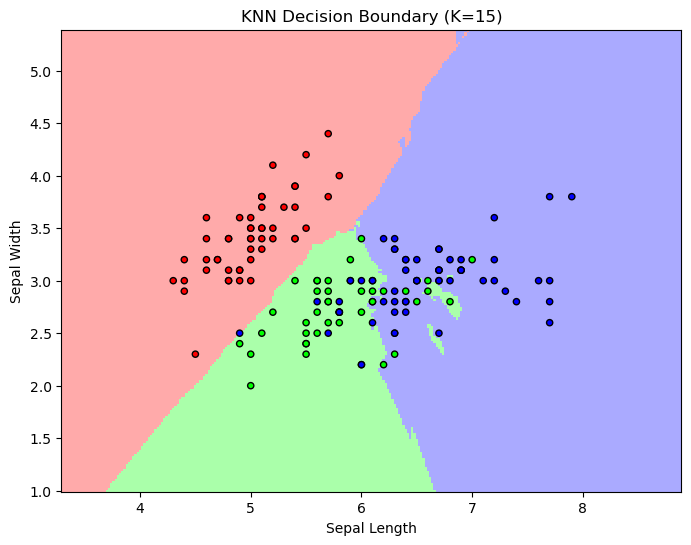

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Load iris Data
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

def plot_knn_boundary(k):
    #Create the model
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X, y)

    # Create a meshgrid to plot the background color
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # Predict for every point in the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"KNN Decision Boundary (K={k})")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# Visualize Overfitting (K=1) vs Generalization (K=15)
plot_knn_boundary(1)
plot_knn_boundary(15)
    

# Excercise

1. Import necessary libraries.
2. Load and split the data.
3. Instantiate the KNeighborsClassifier.
4. Fit the model.
5. Evaluate accuracy.

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def run_knn_workflow():
    # load and split data
    # use iris data set 150 samples , 4 features , 3 classes
    iris = load_iris()
    x = iris.data
    y = iris.target

    # split the data set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    print(f'Training set shape{X_train.shape}')
    print(f'Test set shape:{X_test.shape}')

    # Instantiate The KNNclassifier
    knn_model = KNeighborsClassifier(n_neighbors=3)
    # Fit the model
    knn_model.fit(X_train, y_train)

    # Evaluate accuracy
    y_pred = knn_model.predict(X_test)
    # Then we compare predictions againts the actual labels
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel Configuration: k=3")
    print(f"Accuracy Score: {accuracy:.4f} ({accuracy * 100:.2f}%)")


if __name__ == "__main__":
    run_knn_workflow()

Training set shape(120, 2)
Test set shape:(30, 2)

Model Configuration: k=3
Accuracy Score: 0.8000 (80.00%)
